# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import statsmodels.api as sm
from scipy.stats import linregress
from pprint import pprint
from sklearn.linear_model import LinearRegression


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lats = []
longs = []
temps = []
feels_like = []
humidities = []
pressures = []
speeds = []
cloudiness = []
cities_found = []

for x in range(len(cities)):
    city = cities[x]
    
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&{units}&appid={weather_api_key}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        try:
            # Convert Raw Data to DataFrame
            lat = data["coord"]["lat"]
            long = data["coord"]["lon"]
            temp = data["main"]["temp"]
            feel_like = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            cloud = data["clouds"]["all"]
            city_found = data["name"]
            
            
            lats.append(lat)
            longs.append(long)
            temps.append(temp)
            feels_like.append(feel_like)
            humidities.append(humidity)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(cloud)
            cities_found.append(city_found)
            
        except Exception as e:
            print(f"The exception for city {city} is: {e}")
        
    elif response.status_code == 404:
        print(f"Missing data for {city} in OpenWeatherAPI")
    else:
        print(response.status_code)
        print("Error")
        
        
    time.sleep(1.2)
    
# make the dataframe
df = pd.DataFrame()
df["City"] = cities_found
df["Latitude"] = lats
df["Longitude"] = longs
df["Temperature"] = temps
df["Feels Like"] = feels_like
df["Humidity"] = humidities
df["Pressure"] = pressures
df["Wind Speed"] = speeds
df["Cloudiness"] = cloudiness

df.head(10)

Missing data for belushya guba in OpenWeatherAPI
Missing data for litayen in OpenWeatherAPI
Missing data for juifang in OpenWeatherAPI
Missing data for samusu in OpenWeatherAPI
Missing data for palabuhanratu in OpenWeatherAPI
Missing data for skagastrond in OpenWeatherAPI
Missing data for amderma in OpenWeatherAPI
Missing data for afmadu in OpenWeatherAPI
Missing data for tawkar in OpenWeatherAPI
Missing data for sentyabrskiy in OpenWeatherAPI
Missing data for achisay in OpenWeatherAPI
Missing data for dolbeau in OpenWeatherAPI
Missing data for illoqqortoormiut in OpenWeatherAPI
Missing data for attawapiskat in OpenWeatherAPI
Missing data for nizhneyansk in OpenWeatherAPI
Missing data for solovetskiy in OpenWeatherAPI
Missing data for tumannyy in OpenWeatherAPI
Missing data for wulanhaote in OpenWeatherAPI
Missing data for grand river south east in OpenWeatherAPI
Missing data for mys shmidta in OpenWeatherAPI
Missing data for ambodifototra in OpenWeatherAPI
Missing data for saleaula in

,City,Lattitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Qaanaaq,77.48,-69.36,250.93,244.69,70,1015,3.54,0
1,Busselton,-33.65,115.33,289.22,287.90,81,1000,3.13,99
2,Cidreira,-30.18,-50.21,293.29,291.27,88,1017,6.93,100
3,Russell,32.35,-85.20,293.98,295.23,83,1021,2.10,1
4,Chui,-33.70,-53.46,287.92,286.78,89,1020,2.95,41
5,Nioaque,-21.14,-55.83,300.62,300.56,38,1009,0.91,69
6,Lebu,-37.62,-73.65,283.91,278.44,93,1020,7.76,47
7,Govlyar,40.95,45.73,281.15,278.76,87,1028,2.10,90
8,Ponta do Sol,32.67,-17.10,289.00,286.16,68,1023,4.10,20
9,Ushuaia,-54.80,-68.30,277.15,271.86,85,1010,5.10,75


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "forestgreen")
plt.title("Latitude and Temperature of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Latitude'

<Figure size 720x432 with 0 Axes>

## Latitude vs. Humidity Plot

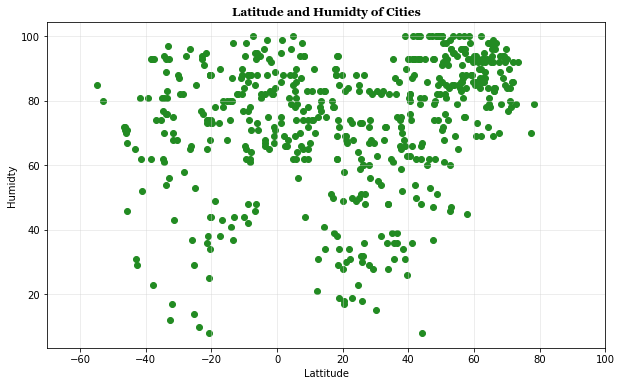

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "forestgreen")
plt.title("Latitude and Humidty of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)
plt.show()

## Latitude vs. Cloudiness Plot

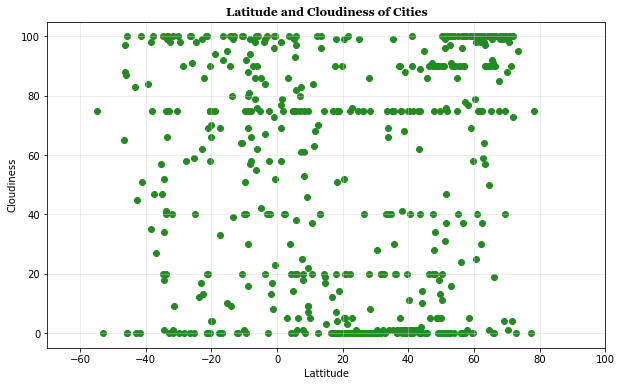

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "forestgreen")
plt.title("Latitude and Cloudiness of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)
plt.show()

## Latitude vs. Wind Speed Plot

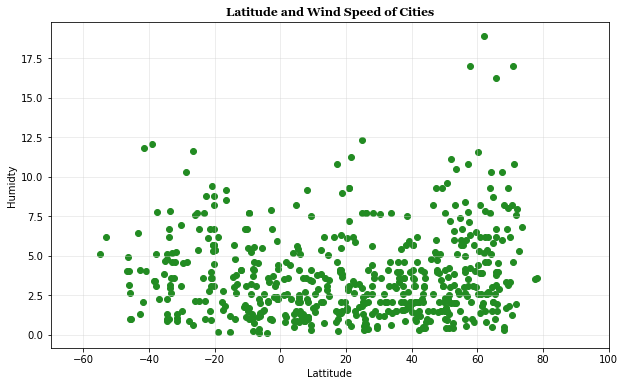

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "forestgreen")
plt.title("Latitude and Wind Speed of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.xlim(-70,100)
plt.grid(color="lightgrey", alpha = 0.5)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
 plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "forestgreen")
plt.title("Latitude and Temperature of Cities", fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-70, 100)
plt.plot(feature, regress_values, color="skyblue")
plt.annotate(line_eq,(-40, 0),fontsize=15,color="red")

plt.show()

AttributeError: 'DataFrame' object has no attribute 'Latitude'

<Figure size 720x432 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


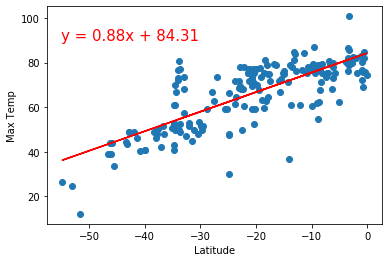

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


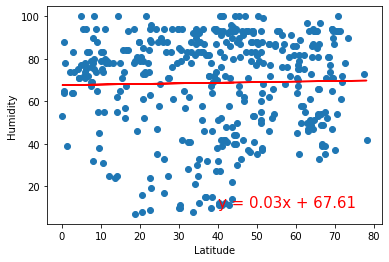

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


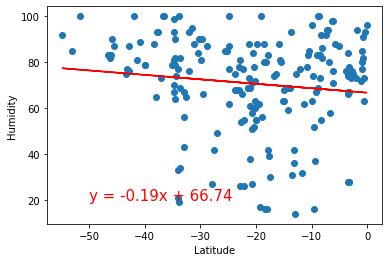

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


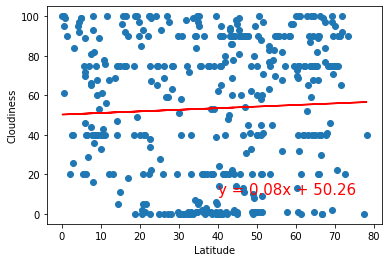

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


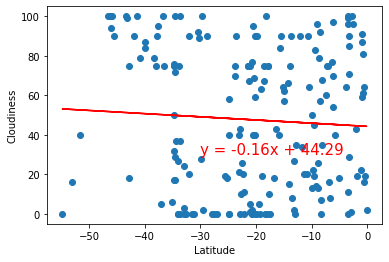

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


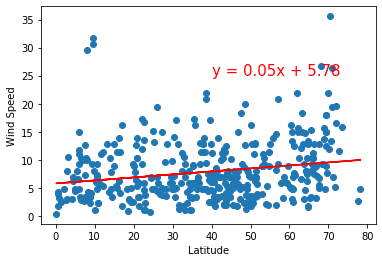

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


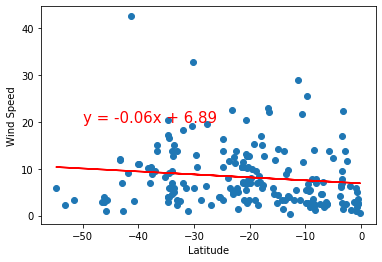